Saving 6. Predict Employee Attrition.csv to 6. Predict Employee Attrition (5).csv
Dataset Preview:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical           

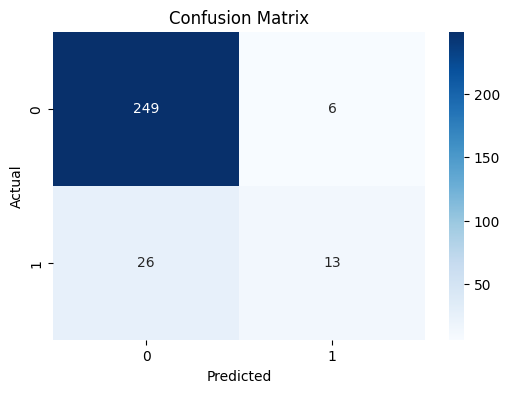

In [ ]:
# Step 1: Install necessary libraries
!pip install -q seaborn scikit-learn matplotlib pandas

# Step 2: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

# Step 3: Upload dataset
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))

# Step 4: Preview dataset
print("Dataset Preview:")
print(df.head())

# Step 5: Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Optional: Fill or drop missing values
df.dropna(inplace=True)

# Step 6: Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 7: Feature-target split
# Change 'Attrition' below to match your dataset's target column name
target_column = 'Attrition'  # 🔁 Change this if needed
X = df.drop(columns=[target_column])
y = df[target_column]

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 10: Train classification model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 11: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 12: Evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='binary')
rec = recall_score(y_test, y_pred, average='binary')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy:  {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")

# Step 13: Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

